In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_m1p1 = pd.read_csv("resM1P1.csv", sep=";", na_values="NA")
df_m1p1.set_index("plant", inplace=True)
df_m1p2 = pd.read_csv("resM1P2.csv", sep=";", na_values="NA")
df_m1p2.set_index("plant", inplace=True)
df_m1p3 = pd.read_csv("resM1P3.csv", sep=";", na_values="NA")
df_m1p3.set_index("plant", inplace=True)
df_m1p4 = pd.read_csv("resM1P4.csv", sep=";", na_values="NA")
df_m1p4.set_index("plant", inplace=True)

In [3]:
#print(np.where(df_m1p1['markA.1'].notnull())[0])
df_m1p1_1_na = df_m1p1['markA.1'].index[df_m1p1['markA.1'].apply(np.isnan)]
df_m1p1_2_na = df_m1p1['markA.2'].index[df_m1p1['markA.2'].apply(np.isnan)]
df_m1p2_1_na = df_m1p2['markA.1'].index[df_m1p2['markA.1'].apply(np.isnan)]
df_m1p2_2_na = df_m1p2['markA.2'].index[df_m1p2['markA.2'].apply(np.isnan)]
df_m1p3_1_na = df_m1p3['markA.1'].index[df_m1p3['markA.1'].apply(np.isnan)]
df_m1p3_2_na = df_m1p3['markA.2'].index[df_m1p3['markA.2'].apply(np.isnan)]
df_m1p4_1_na = df_m1p4['markA.1'].index[df_m1p4['markA.1'].apply(np.isnan)]
df_m1p4_2_na = df_m1p4['markA.2'].index[df_m1p4['markA.2'].apply(np.isnan)]
print(len(df_m1p1_1_na), len(df_m1p1_2_na), len(df_m1p2_1_na), len(df_m1p2_2_na),
      len(df_m1p3_1_na), len(df_m1p3_2_na), len(df_m1p4_1_na), len(df_m1p4_2_na))

39 69 63 57 18 17 19 19


In [4]:
df_na_concat = np.concatenate([df_m1p1_1_na, df_m1p1_2_na, df_m1p2_1_na, df_m1p2_2_na,
                              df_m1p3_1_na, df_m1p3_2_na, df_m1p4_1_na, df_m1p4_2_na])
unique_na_idx = np.unique(df_na_concat)
print(unique_na_idx)

[  1   2  20  31  37  45  47  57  63  69  70  79  80  94 104 109 113 115
 116 119 120 121 123 125 127 129 135 140 149 150 154 158 166 171 172 173
 178 179 181 186 193 202 208 210 225 227 233 240 251 258 263 269 273 276
 279 280 281 282 284 286 295 296 304 306 308 310 316 322 330 337 340 353
 357 358 362 366 370 372 373 374]


In [5]:
df_m1p1.drop(unique_na_idx, axis=0, inplace=True)
df_m1p2.drop(unique_na_idx, axis=0, inplace=True)
df_m1p3.drop(unique_na_idx, axis=0, inplace=True)
df_m1p4.drop(unique_na_idx, axis=0, inplace=True)

In [6]:
from scipy.spatial.distance import pdist, squareform
dist_mat_1 = np.array(squareform(pdist(df_m1p1['markA.1'].values.reshape(-1, 1), 'euclidean')))
dist_mat_2 = np.array(squareform(pdist(df_m1p1['markA.2'].values.reshape(-1, 1), 'euclidean')))
dist_mat_comb_m1p1 = dist_mat_1 + dist_mat_2
dist_mat_1 = np.array(squareform(pdist(df_m1p2['markA.1'].values.reshape(-1, 1), 'euclidean')))
dist_mat_2 = np.array(squareform(pdist(df_m1p2['markA.2'].values.reshape(-1, 1), 'euclidean')))
dist_mat_comb_m1p2 = dist_mat_1 + dist_mat_2
dist_mat_1 = np.array(squareform(pdist(df_m1p3['markA.1'].values.reshape(-1, 1), 'euclidean')))
dist_mat_2 = np.array(squareform(pdist(df_m1p3['markA.2'].values.reshape(-1, 1), 'euclidean')))
dist_mat_comb_m1p3 = dist_mat_1 + dist_mat_2
dist_mat_1 = np.array(squareform(pdist(df_m1p4['markA.1'].values.reshape(-1, 1), 'euclidean')))
dist_mat_2 = np.array(squareform(pdist(df_m1p4['markA.2'].values.reshape(-1, 1), 'euclidean')))
dist_mat_comb_m1p4 = dist_mat_1 + dist_mat_2
dist_mat_comb_tot = dist_mat_comb_m1p1 + dist_mat_comb_m1p2 + dist_mat_comb_m1p3 + dist_mat_comb_m1p4

In [8]:
dist_mat_comb_tot

array([[  0. ,  26. ,  26. , ...,  76.5, 125. , 129.5],
       [ 26. ,   0. ,   0. , ...,  70.5,  99. , 123.5],
       [ 26. ,   0. ,   0. , ...,  70.5,  99. , 123.5],
       ...,
       [ 76.5,  70.5,  70.5, ...,   0. ,  75.5,  92. ],
       [125. ,  99. ,  99. , ...,  75.5,   0. , 160.5],
       [129.5, 123.5, 123.5, ...,  92. , 160.5,   0. ]])

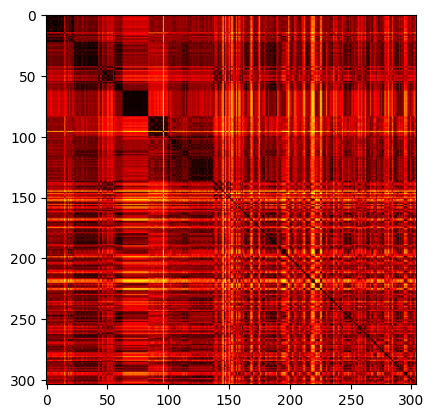

In [9]:
plt.imshow(dist_mat_comb_tot, cmap='hot')